# Data Cleaning

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno

In [149]:
# Load in data
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
pd.set_option('display.max_columns', None)
style.use('seaborn-whitegrid')
sns.set_context('notebook', font_scale=1.2)


In [150]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [151]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [152]:
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


In [153]:
# Concatenating both train and test dataframes to clean together
combine = pd.concat([train.assign(ind="train"), test.assign(ind="test")])

In [154]:
print(combine.shape)

(2929, 82)


In [155]:
# Renaming column names to snake case
combine.columns = combine.columns.str.lower().str.replace(' ','_')

In [156]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2929 non-null   int64  
 1   pid              2929 non-null   int64  
 2   ms_subclass      2929 non-null   int64  
 3   ms_zoning        2929 non-null   object 
 4   lot_frontage     2439 non-null   float64
 5   lot_area         2929 non-null   int64  
 6   street           2929 non-null   object 
 7   alley            198 non-null    object 
 8   lot_shape        2929 non-null   object 
 9   land_contour     2929 non-null   object 
 10  utilities        2929 non-null   object 
 11  lot_config       2929 non-null   object 
 12  land_slope       2929 non-null   object 
 13  neighborhood     2929 non-null   object 
 14  condition_1      2929 non-null   object 
 15  condition_2      2929 non-null   object 
 16  bldg_type        2929 non-null   object 
 17  house_style    

### Cleaning Functions

In [157]:
# Generate new column for quartile of sale price
saleprice_q = combine[combine['saleprice'].notnull()]['saleprice'].quantile([0.25, 0.5, 0.75])

def set_quartile(i):
    if pd.isna(i):
        return pd.NA
    elif i < saleprice_q[0.25]: 
        return '1st_q'
    elif i < saleprice_q[0.5]:
        return '2nd_q'
    elif i < saleprice_q[0.75]:
        return '3rd_q'
    else:
        return '4th_q'

combine['saleprice_quart'] = combine['saleprice'].apply(set_quartile) 

In [158]:
# Defining function to check with correlation with sale price. If null values are randomly distributed, they should be evenly distributed across all 4 quartiles of sale price. 
def corr_y(col):
    return combine[combine[col].isnull()].groupby('saleprice_quart')[col].size()

In [159]:
# Defining function to replace null values
def replace_na(col, val):
    combine[col] = combine[col].fillna(val)

### Filling Null Values

In [160]:
# Counting the number of null values in each column
def count_nulls(data):
    null_count = {}
    for col in data:
        if data[col].isna().sum() > 0:
            null_count[f'{col}'] = data[col].isna().sum()
    return null_count

count_nulls(combine)

{'lot_frontage': 490,
 'alley': 2731,
 'mas_vnr_type': 23,
 'mas_vnr_area': 23,
 'bsmt_qual': 80,
 'bsmt_cond': 80,
 'bsmt_exposure': 83,
 'bsmtfin_type_1': 80,
 'bsmtfin_sf_1': 1,
 'bsmtfin_type_2': 81,
 'bsmtfin_sf_2': 1,
 'bsmt_unf_sf': 1,
 'total_bsmt_sf': 1,
 'electrical': 1,
 'bsmt_full_bath': 2,
 'bsmt_half_bath': 2,
 'fireplace_qu': 1422,
 'garage_type': 157,
 'garage_yr_blt': 159,
 'garage_finish': 159,
 'garage_cars': 1,
 'garage_area': 1,
 'garage_qual': 159,
 'garage_cond': 159,
 'pool_qc': 2916,
 'fence': 2357,
 'misc_feature': 2823,
 'saleprice': 878,
 'saleprice_quart': 878}

#### Basement data

In [161]:
# Basement null values are highly correlated with sale price. This is likely as these are houses with no basements, which bring down the sale price. We shall assume that we can fill these cells with NA or 0 values after investigating anomalies. 
corr_y('bsmt_qual')

saleprice_quart
1st_q    42
2nd_q     9
3rd_q     2
4th_q     2
Name: bsmt_qual, dtype: int64

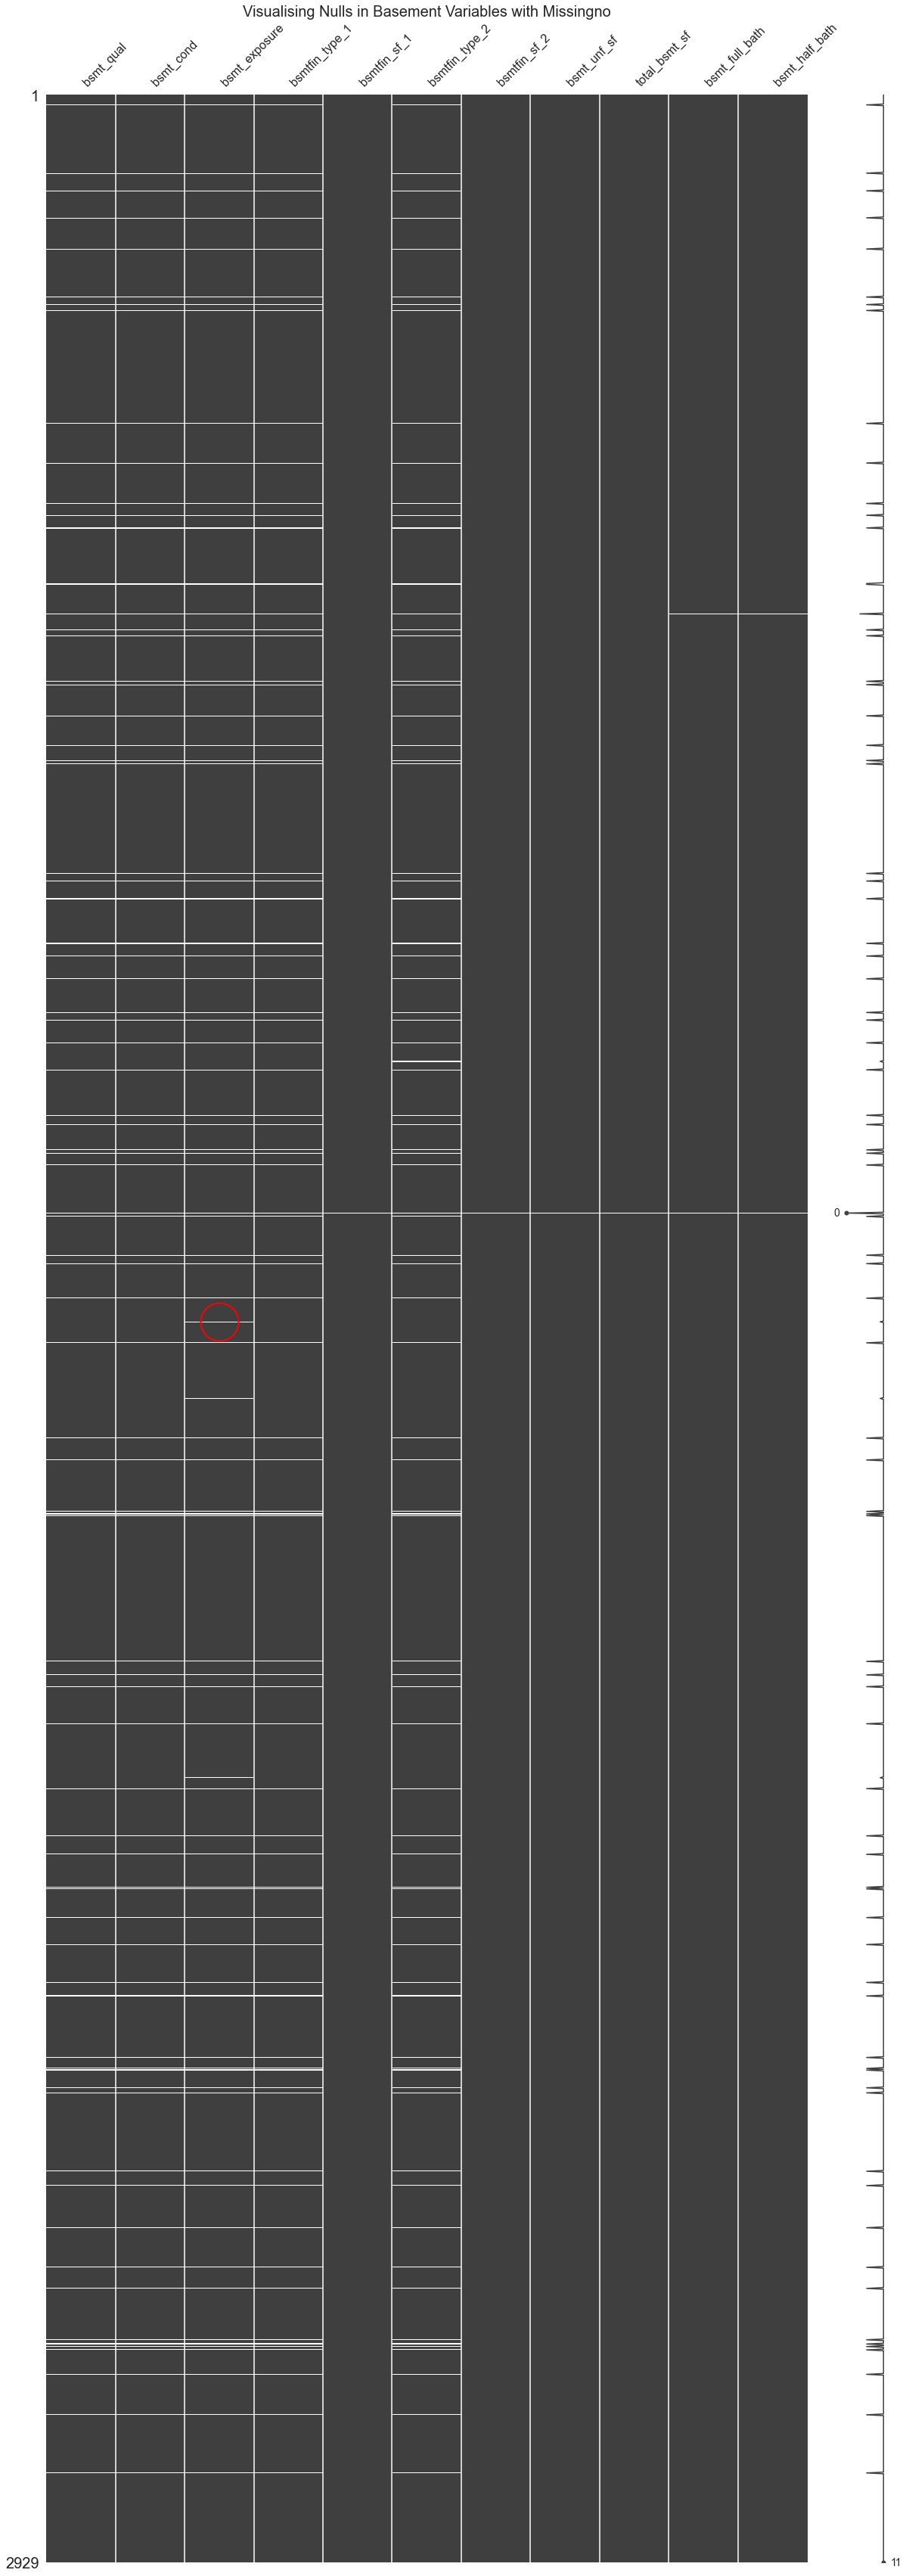

In [162]:
# Anomalies are rows where values have been filled in for some basement variables but not others. This does not make sense - these rows should either be all filled or all NA/0/null as the basement is not present. 

# We can use the missingno library to visualise these anomalies. Using the matrix function, we can see anomalies exist for bsmt_exposure, and bsmtfin_type_2 (see red circle for an example). However, I found identifying these anomalies to be tedious as it requires visually inspecting every white line in the matrix. If I had more time, I would try defining a function to return anomalies.
bsmt_cols = combine.columns[combine.columns.str.contains('bsmt')]
g = msno.matrix(combine.loc[:,bsmt_cols], figsize=(20,60))
g.plot(2, 1456, 'o', ms=50, mec='r', mfc='none', mew=2)
plt.title('Visualising Nulls in Basement Variables with Missingno', fontsize=20)
plt.savefig('../images/visualising_nulls.png', bbox_inches='tight', facecolor='w')
plt.show()

In [163]:
combine[(combine['bsmt_exposure'].isnull()) & (combine['bsmt_qual'].notnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,ind,saleprice_quart
1456,1797,528458090,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109.0,train,3rd_q
1547,67,528445060,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500.0,train,4th_q
1997,2780,907194130,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500.0,train,3rd_q


In [164]:
combine[(combine['bsmtfin_type_1']=='Unf') & (combine['bsmtfin_type_2']=='Unf') & (combine['ind']=='train')].loc[:,'bsmt_exposure'].value_counts()

No    478
Av     62
Mn     41
Gd     19
Name: bsmt_exposure, dtype: int64

In [165]:
# There are three houses with basement quality and condition values but missing basement exposure data. As they seem all to be unfinished basements, we assign the mode of unfinished basements in the train set, 'No', to them, as this is most likely. 
# We take care to only look-up means and modes of train set, to avoid data leakage from test set.
combine.loc[[1456, 1547, 1997],['bsmt_exposure']]='no'

In [166]:
combine[(combine['bsmtfin_type_2'].isnull()) & (combine['bsmt_qual'].notnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,ind,saleprice_quart
1147,445,528142130,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000.0,train,4th_q


In [167]:
combine[(combine['bsmtfin_type_1']=='GLQ') & (combine['bsmt_unf_sf']>0) & (combine['bsmtfin_sf_2']!=combine['bsmt_unf_sf']) & (combine['ind']=='train')].loc[:,'bsmtfin_type_2'].value_counts()

Unf    546
Rec     13
ALQ     11
LwQ      5
BLQ      4
Name: bsmtfin_type_2, dtype: int64

In [168]:
# There is a house with basement quality and basement condition values but is missing a value for basement type 2. As such, we assign the mode of similar houses with type 1 'GLQ', which is 'Unf', to it. 
combine.loc[[1147],['bsmtfin_type_2']]='Unf'

In [169]:
# Remaining missing values can be replaced with NA or 0 depending on data type as it likely indicates no basement. 
replace_na('bsmt_qual', 'NA')
replace_na('bsmt_cond', 'NA')
replace_na('bsmt_exposure', 'NA')
replace_na('bsmtfin_type_1', 'NA')
replace_na('bsmtfin_type_2', 'NA')

In [170]:
replace_na('bsmtfin_sf_1', 0)
replace_na('bsmtfin_sf_2', 0)
replace_na('bsmt_unf_sf', 0)
replace_na('total_bsmt_sf', 0)
replace_na('bsmt_full_bath', 0)
replace_na('bsmt_half_bath', 0)

#### Garage data

In [171]:
# Similarly, garage null values are highly correlated with sale price, and are likely houses with no garages. Hence, we should impute NA or 0 values if the values are consistent across the row. 
corr_y('garage_type')

saleprice_quart
1st_q    87
2nd_q    22
3rd_q     4
Name: garage_type, dtype: int64

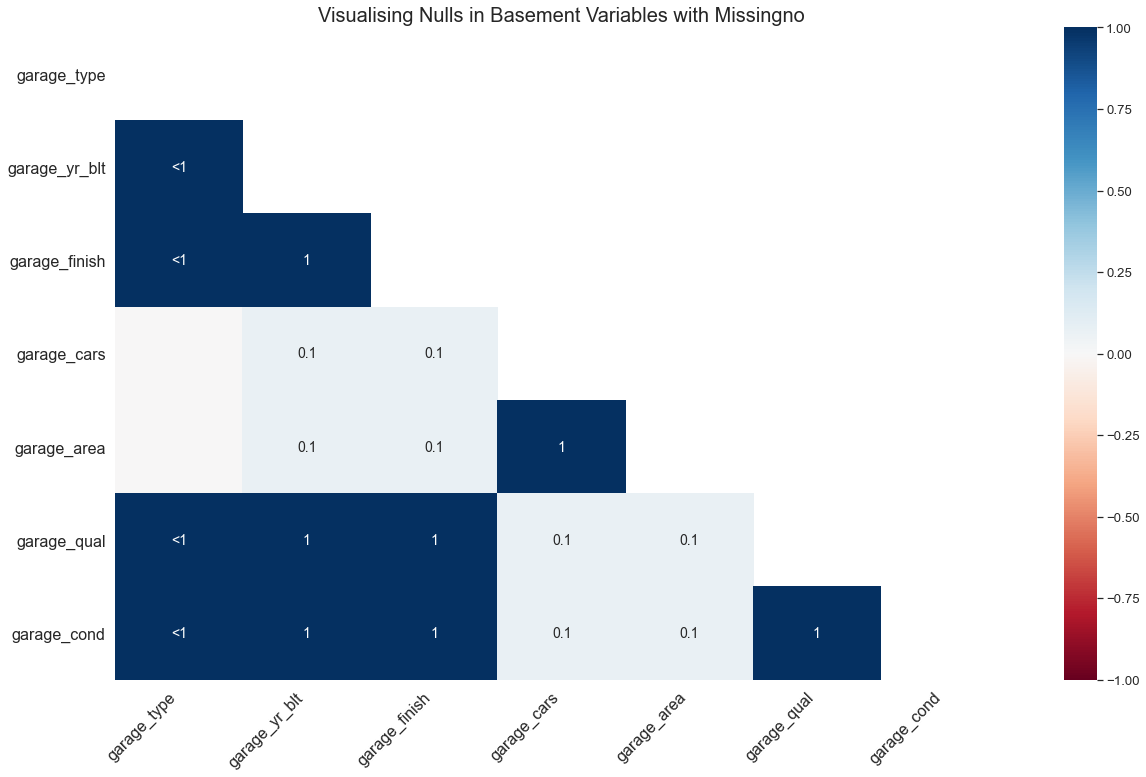

In [172]:
# Like basement variable values, garage variable nulls should also be correlated with each other in order for the assessment to be consistent
# This time, we use the missingno library heatmap to visualise anomalies. A correlation of 1 indicates a perfect correlation in null values which is what we should expect. What we are interested in is the correlations of <1 and 0.1. 
garage_cols = combine.columns[combine.columns.str.contains('garage')]
msno.heatmap(combine.loc[:,garage_cols])
plt.title('Visualising Nulls in Basement Variables with Missingno', fontsize=20)
plt.show()

In [173]:
# An investigation of the 0.1 values in the correlation show that this is as most houses without a garage have been populated with 0 for garage_cars and garage_area. This makes sense and does not have to be corrected. 
combine.loc[combine['garage_qual'].isnull() & combine['garage_cars'].notnull()][garage_cols].head()


,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [174]:
combine.loc[combine['garage_type'].notnull() & combine['garage_finish'].isnull()][garage_cols]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN
764,Detchd,NaN,NaN,1.0,360.0,NaN,NaN


In [175]:
# Looking at the <1 correlations, there seem to be two houses with garage_type detached but with null values for other garage variables. For the first, we will assume that this was a mistake in data entry and get rid of the garage_type value. For the second, we will impute values based on the mode of other detached garages in the train set, apart from garage_yr_blt which we will handle subsequently.
combine.loc[1712,['garage_type']]='NA'

In [176]:
combine[(combine['garage_type']=='Detchd') & (combine['ind']=='train')]['garage_finish'].value_counts()

Unf    497
RFn     24
Fin     14
Name: garage_finish, dtype: int64

In [177]:
combine[(combine['garage_type']=='Detchd') & (combine['ind']=='train')]['garage_qual'].value_counts()

TA    467
Fa     60
Ex      3
Gd      3
Po      2
Name: garage_qual, dtype: int64

In [178]:
combine[(combine['garage_type']=='Detchd') & (combine['ind']=='train')]['garage_cond'].value_counts()

TA    483
Fa     43
Po      6
Ex      2
Gd      1
Name: garage_cond, dtype: int64

In [179]:
combine.loc[764,['garage_finish', 'garage_qual', 'garage_cond']] = 'unf', 'ta', 'ta'

In [180]:
# The garage_yr_blt variable is highly correlated with the year_built variable, the original construction date of the house. It is likely that many garages were built together with the house. 

print(combine['garage_yr_blt'].corr(combine['year_built']))

0.8347714916431126


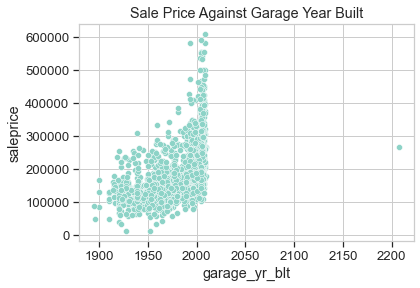

In [181]:
# There is an outlier in the variable
g = sns.scatterplot(data=combine, x='garage_yr_blt', y='saleprice')
plt.title('Sale Price Against Garage Year Built')
plt.savefig('../images/garage_year_outlier.png', bbox_inches='tight', facecolor='w')
plt.show()

In [182]:
combine[combine['garage_yr_blt']>2200]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,ind,saleprice_quart
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300.0,train,4th_q


In [183]:
# For the garage_yr_blt variable, while it makes sense to impute 0 for nulls, am concerned that it would heavily skew the distribution given that most values are in the range of 1900 to 2000. To avoid doing so, we can impute the year built instead. The effect of existence of a garage should already be explained by the other garage variables.

replace_na('garage_yr_blt', combine['year_built'])

In [184]:
# I shall assume that this value was a typo
combine.loc[1699, 'garage_yr_blt']=2007

In [185]:
# Remaining missing values can be replaced with NA or 0 depending on data type as it likely indicates no garage. 
replace_na('garage_type', 'NA')
replace_na('garage_finish', 'NA')
replace_na('garage_qual', 'NA')
replace_na('garage_cond', 'NA')

In [186]:
replace_na('garage_cars', 0)
replace_na('garage_area', 0)

#### Masonry Data

In [187]:
# There appears to be some correlation between a null masonry veneer type and saleprice. However, this does not match the sale price distribution for the 'None' masonry veneer type. Despite this, am uncomfortable to impute BrkFace or Stone as there is no explanation for why the assessor did not input such data. In the absence of a better explanation, we choose to impute null values as None type with 0 area. 
corr_y('mas_vnr_type')

saleprice_quart
1st_q     1
3rd_q    10
4th_q    11
Name: mas_vnr_type, dtype: int64

In [188]:
pd.crosstab(combine['saleprice_quart'], combine['mas_vnr_type'])

mas_vnr_type,BrkCmn,BrkFace,None,Stone
saleprice_quart,,,,
1st_q,6,57,442,7
2nd_q,3,139,348,21
3rd_q,3,188,273,37
4th_q,1,246,155,103


In [189]:
replace_na('mas_vnr_type', 'NA')
replace_na('mas_vnr_area', 0)

#### Other Features

In [190]:
# There is one house with no value for electrical system, which we will fill in with the mode electrical system. 
combine[combine['electrical'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,ind,saleprice_quart
634,1578,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,NaN,test,<NA>


In [191]:
combine[(combine['ind']=='train')]['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [192]:
replace_na('electrical', 'SBrkr')

In [193]:
count_nulls(combine)

{'lot_frontage': 490,
 'alley': 2731,
 'fireplace_qu': 1422,
 'pool_qc': 2916,
 'fence': 2357,
 'misc_feature': 2823,
 'saleprice': 878,
 'saleprice_quart': 878}

In [194]:
# There are 5 categorical features where the null values likely correspond to NA where there is no such feature at the house, as there is no such category in the unique values currently. We can thus make a new category 'NA' for each of them. 
print(combine['alley'].unique())
print(combine['fireplace_qu'].unique())
print(combine['pool_qc'].unique())
print(combine['fence'].unique())
print(combine['misc_feature'].unique())

[nan 'Pave' 'Grvl']
[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
[nan 'Fa' 'Gd' 'Ex' 'TA']
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']


In [195]:
replace_na('alley', 'NA')
replace_na('fireplace_qu', 'NA')
replace_na('pool_qc', 'NA')
replace_na('fence', 'NA')
replace_na('misc_feature', 'NA')

### Dummifying Categorical Variables

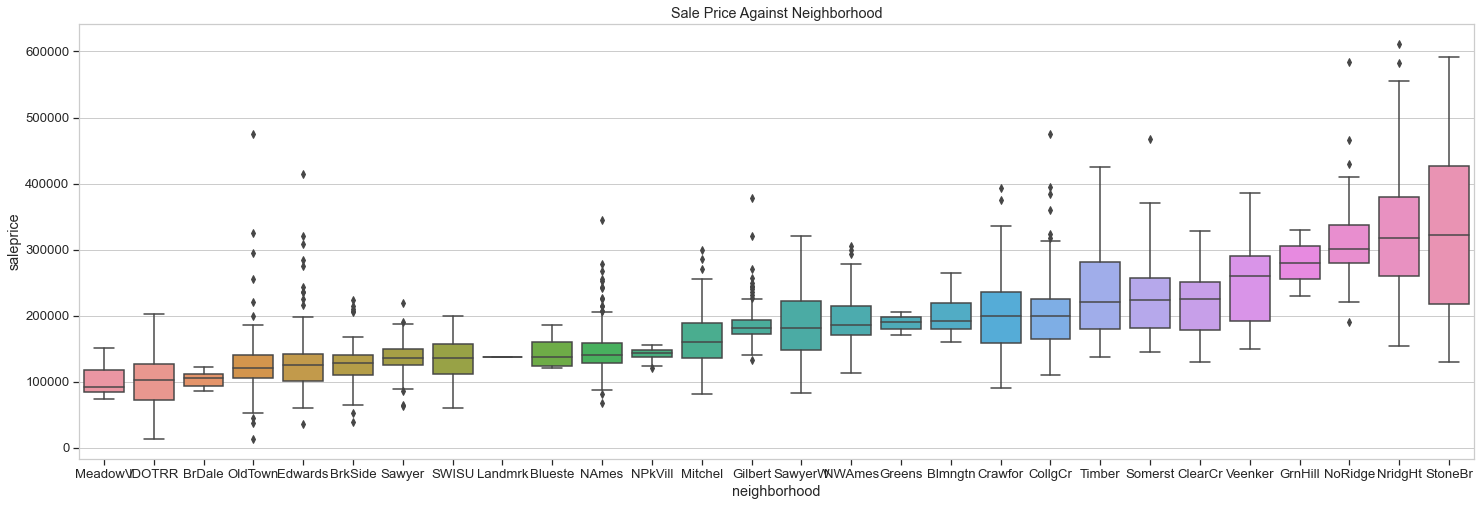

In [196]:
# Investigating some categorical variables. There is a clear relationship between these categoricals and saleprice, and the variables should not be dropped. 
fig = plt.figure(figsize=(25,8))
g = sns.boxplot(data=combine, x='neighborhood', y='saleprice', order=combine.groupby('neighborhood')['saleprice'].median().sort_values().index)
plt.title('Sale Price Against Neighborhood')
plt.savefig('../images/neighborhood.png', bbox_inches='tight', facecolor='w')
plt.show()

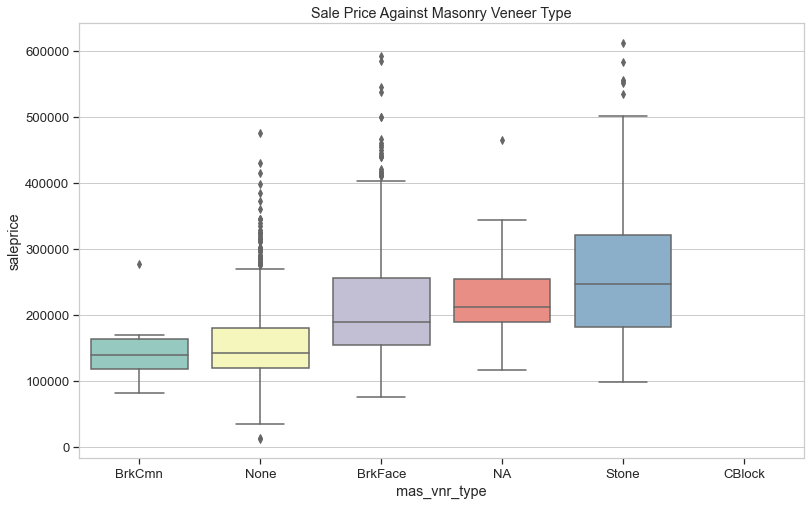

In [197]:
fig = plt.figure(figsize=(13,8))
g = sns.boxplot(data=combine, x='mas_vnr_type', y='saleprice', order=combine.groupby('mas_vnr_type')['saleprice'].median().sort_values().index)
plt.title('Sale Price Against Masonry Veneer Type')
plt.show()

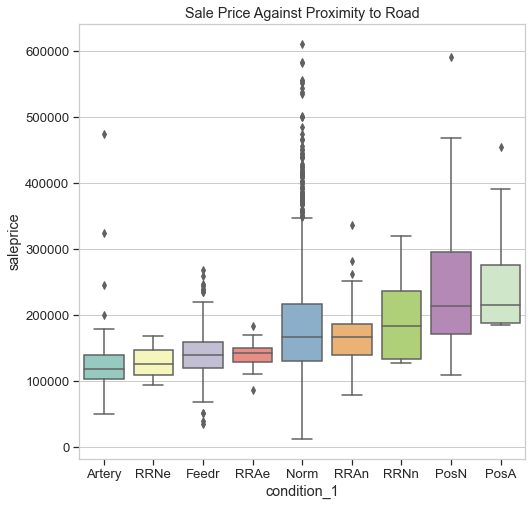

In [198]:
fig = plt.figure(figsize=(8,8))
g = sns.boxplot(data=combine, x='condition_1', y='saleprice', order=combine.groupby('condition_1')['saleprice'].median().sort_values().index)
plt.title('Sale Price Against Proximity to Road')
plt.savefig('../images/road_prox.png', bbox_inches='tight', facecolor='w')
plt.show()

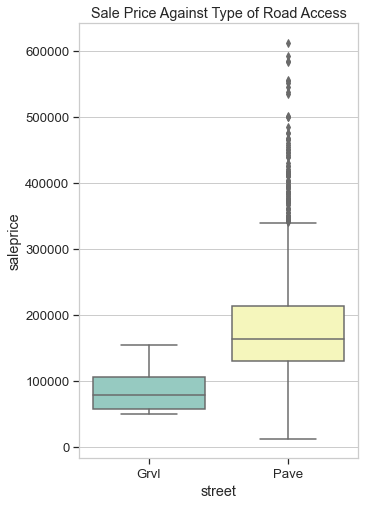

In [199]:
fig = plt.figure(figsize=(5,8))
g = sns.boxplot(data=combine, x='street', y='saleprice', order=combine.groupby('street')['saleprice'].median().sort_values().index)
plt.title('Sale Price Against Type of Road Access')
plt.savefig('../images/road_type.png', bbox_inches='tight', facecolor='w')
plt.show()

In [200]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2929 non-null   int64  
 1   pid              2929 non-null   int64  
 2   ms_subclass      2929 non-null   int64  
 3   ms_zoning        2929 non-null   object 
 4   lot_frontage     2439 non-null   float64
 5   lot_area         2929 non-null   int64  
 6   street           2929 non-null   object 
 7   alley            2929 non-null   object 
 8   lot_shape        2929 non-null   object 
 9   land_contour     2929 non-null   object 
 10  utilities        2929 non-null   object 
 11  lot_config       2929 non-null   object 
 12  land_slope       2929 non-null   object 
 13  neighborhood     2929 non-null   object 
 14  condition_1      2929 non-null   object 
 15  condition_2      2929 non-null   object 
 16  bldg_type        2929 non-null   object 
 17  house_style    

In [201]:
combine = pd.get_dummies(combine, columns = ['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type'], drop_first=True, prefix_sep='-')

In [202]:
combine.shape

(2929, 294)

### Using IterativeImputer on Lot Frontage

In [203]:
# Lot Frontage poses a challenge as it does not make sense for lot frontage to be 0. We thus use IterativeImputer, which tries to predict the values based on the other variables
# Split dataframes into two
train = combine.loc[combine["ind"]==("train"), :].copy()
test = combine.loc[combine["ind"]==("test"), :].copy()

In [204]:
# Dropping categorical columns which are no longer needed
train.drop(columns=['saleprice_quart', 'ind'], inplace=True)
test.drop(columns=['saleprice_quart','ind', 'saleprice'], inplace=True)

In [205]:
# Some correlation exists between sale price and lot_frontage, thus it should not be dropped. 
train['saleprice'].corr(train['lot_frontage'])

0.3418424837268713

In [206]:
# Dropping saleprice to avoid predicting X_train with saleprice, which allows us to transform the test set with the same fitted model
X_train = train.drop(columns=['saleprice'])
print(count_nulls(X_train))
print(count_nulls(test))

{'lot_frontage': 330}
{'lot_frontage': 160}


In [207]:
imputer = IterativeImputer(random_state = 42)
X_train_imp = imputer.fit_transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp, columns = X_train.columns)

In [208]:
test_imp = imputer.transform(test)
test_imp = pd.DataFrame(test_imp, columns=test.columns)

In [209]:
train['lot_frontage'] = X_train_imp['lot_frontage']
test['lot_frontage'] = test_imp['lot_frontage']

In [210]:
# Null values have been imputed
print(count_nulls(train))
print(count_nulls(test))

{}
{}


### Saving Cleaned Data

In [211]:
train.to_csv('../datasets/train_clean.csv', index=False)
test.to_csv('../datasets/test_clean.csv', index=False)